In [1]:
import os,sys
# torch 
import torch # pytorch package, allows using GPUs
import torch.nn.functional as F # implements forward and backward definitions of an autograd operation
from torch import nn, optim
from torch.nn.modules import Module
from torchvision import datasets # load data
from torch.autograd import Variable
import torch.optim as optim

#own modules

from run_training import run_analysis
from Networks import *
from Visualization import *

if torch.cuda.is_available():
    device = torch.device('cuda')
    print("Using cuda device for all tensor calculations.")
else:
    device = torch.device('cpu')
    print("Using cpu device for all tensor calculations.")

Using cpu device for all tensor calculations.


In [2]:
nb_trials = 3
epochs = 30

Training Simple convolutional network with the following architecture:
 plain_model(
  (ch1): ModuleList(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
  )
  (ch2): ModuleList(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
  )
  (layers): ModuleList(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1024, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): Linear(in_features=32, out_features=2, bias=True)
    (5): Sigmoid()
  )
)


  0%|          | 0/3 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (91.400%), Accuracy(Test): (92.100%)
ran for a total of 30 epochs

 

[Final Result] Accuracy(Training): (90.400%), Accuracy(Test): (93.900%)
ran for a total of 30 epochs

 

[Final Result] Accuracy(Training): (89.600%), Accuracy(Test): (89.000%)
ran for a total of 30 epochs

 



/home/rudi/Documents/Uni/Courses-Exchange/DeepLearning/Final_Project/Project_1/Visualization.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


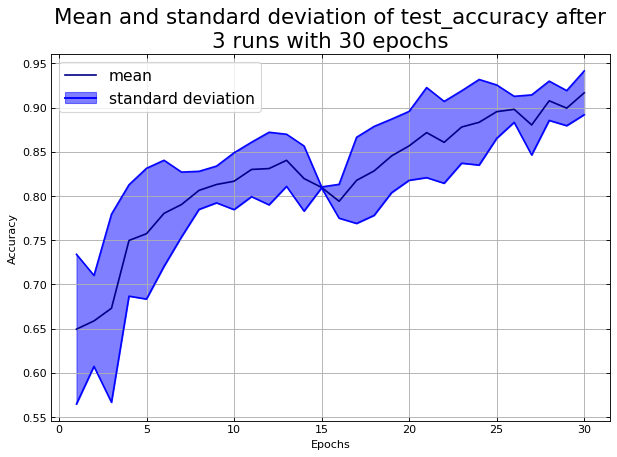

In [3]:
pm_results = run_analysis(plain_model, nb_trials, epochs, [64, 64, 32], device, lr=.01, BN=False, DO=None)

Training Improved convolutional network with the following architecture:
 plain_model(
  (ch1): ModuleList(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
  )
  (ch2): ModuleList(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
  )
  (layers): ModuleList(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1024, out_features=64, bias=True)
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Linear(in_fe

  0%|          | 0/3 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (95.600%), Accuracy(Test): (95.000%)
ran for a total of 30 epochs

 

[Final Result] Accuracy(Training): (95.100%), Accuracy(Test): (88.800%)
ran for a total of 30 epochs

 

[Final Result] Accuracy(Training): (93.700%), Accuracy(Test): (96.500%)
ran for a total of 30 epochs

 



/home/rudi/Documents/Uni/Courses-Exchange/DeepLearning/Final_Project/Project_1/Visualization.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


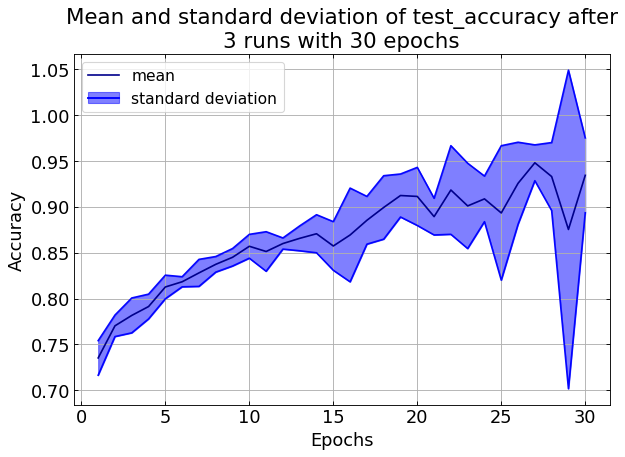

In [4]:
pmi_results = run_analysis(plain_model, nb_trials, epochs, [64, 64, 32], device, lr=.01)

In [ ]:
ws_results = run_analysis(ws_model, nb_trials, epochs, [64, 64, 32], device, lr=.01)

In [ ]:
aux_results = run_analysis(naive_aux_model, nb_trials, epochs, [64, 64, 32], device, lr=.01, DO=None, BN=False)

/home/rudi/Documents/Uni/Courses-Exchange/DeepLearning/Final_Project/Project_1/Visualization.py:77: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


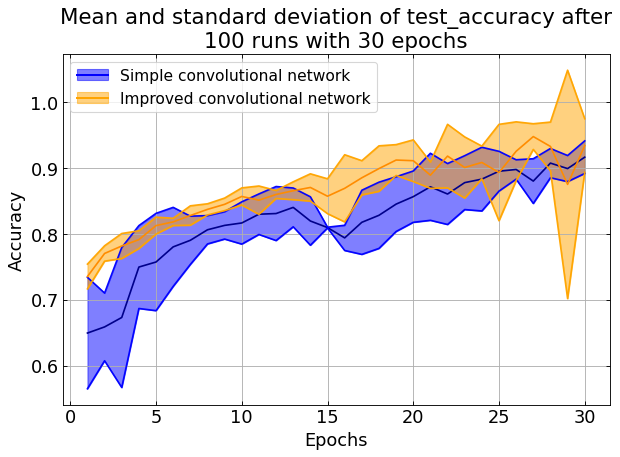

In [5]:
plot_comparison(pm_results, pmi_results, 30, 100)